# Classification

# II. Data

<h6> Introduction to the Data </h6>

> I used one classification based data set$^1$ that collected data from adults around the world and recorded attributes such as education, work class, marital status, occupation, relationship, race, native country, capital-gain and loss and the amount of hours they worked per week. All of these data attributes are used to **classify whether the individual makes more than or less than 50k per year.**

In [1]:
from copy import deepcopy as copy
from IPython.core.debugger import set_trace

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

## Classification - Adult Data
https://archive.ics.uci.edu/ml/datasets/Adult

In [2]:
adult_df = pd.read_csv("adult.csv") 
adult_df = adult_df.rename(columns={' Not-in-family' : 'relationship',' Adm-clerical': 'occupation',' Never-married': 'marital-status',' Bachelors': 'education',' State-gov': 'workclass', ' United-States': 'native-country', ' White' : 'Race', ' Male': 'Sex', '39' : 'Age', ' 77516' : 'final weight', ' 13': 'education-numerical' , ' 2174': 'capital-gain', ' 0': 'capital-loss', ' 40' : 'hours-p-week', ' <=50K' : 'res'})
adult_df

,Age,workclass,final weight,education,education-numerical,marital-status,occupation,relationship,Race,Sex,capital-gain,capital-loss,hours-p-week,native-country,res
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [3]:
X = adult_df.iloc[:,0:-1].columns
T = adult_df.iloc[:,-1]
print(X)
print(adult_df.shape)

Index(['Age', 'workclass', 'final weight', 'education', 'education-numerical',
       'marital-status', 'occupation', 'relationship', 'Race', 'Sex',
       'capital-gain', 'capital-loss', 'hours-p-week', 'native-country'],
      dtype='object')
(32560, 15)


In [4]:
adult_df.describe()

,Age,final weight,education-numerical,capital-gain,capital-loss,hours-p-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<h5> Cleaning the data </h5>

> The adult.names files explains the recorded attribute names. When imported the data columns get shifted and need to be corrected as they are not representative of the correct names (thus, the renaming of columns). Screening the data to see if there are any null entries, but there are not. We see that there are 14 attributes we can use for the classification of the target. The target we are trying to classify is **whether the individual makes less than or equal to 50k annually or not**. 

<h5> Understanding the Data </h5>

> We see with the `adult_df.describe()` above, that the average age is 38 which is definetly targetting mid-aged adults. Furthermore, we see that the average education level that these adults reach to is 10th grade - which is the equivalent to recieving a high school degree before working. We see that the capital-gain and capital-loss are fairly standard (makes sense) for the given adult population. Lastly, the average working time per hour for these adults are more than 40 hours. Meaning a lot of these adults work full time.

In [5]:
graph_df = adult_df.copy()
sex_conversion = {' Male': 0, ' Female' : 1}
race_conversion = {' White' : 0 , ' Black' : 1, ' Asian-Pac-Islander': 2, ' Amer-Indian-Eskimo': 3, ' Other' : 4}
relationship_conversion = {' Own-child': 5 , ' Husband' : 0 , ' Wife': 1, ' Not-in-family' : 2, ' Unmarried': 3, ' Other-relative' : 4}
# # graph_df
graph_df = graph_df.replace({"Sex": sex_conversion, "Race": race_conversion, "relationship": relationship_conversion})

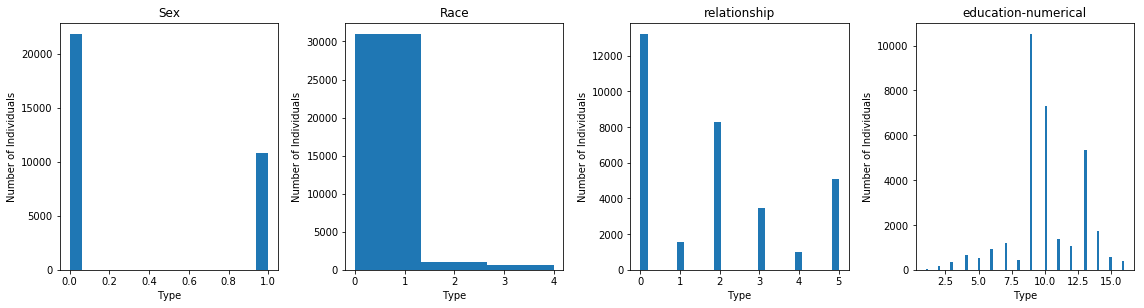

In [6]:
histogram_df = graph_df[['Sex', 'Race','relationship', 'education-numerical']]
fig = plt.figure(figsize=(16,16))
plt.clf() 

# 3 - 3 - 5 - 16 binwidths are for the num of unique values in the columns
for i, binwidth in enumerate([3, 3, 5, 16]):
    ax = plt.subplot(4, 4, i+1)
    if i != 1:
        ax.hist(histogram_df.iloc[:,i], bins = 'auto')
    else:
        ax.hist(histogram_df.iloc[:,i], bins = binwidth)
    ax.set_title(histogram_df.columns[i])
    ax.set_xlabel('Type')
    ax.set_ylabel('Number of Individuals')

plt.tight_layout()
plt.show()

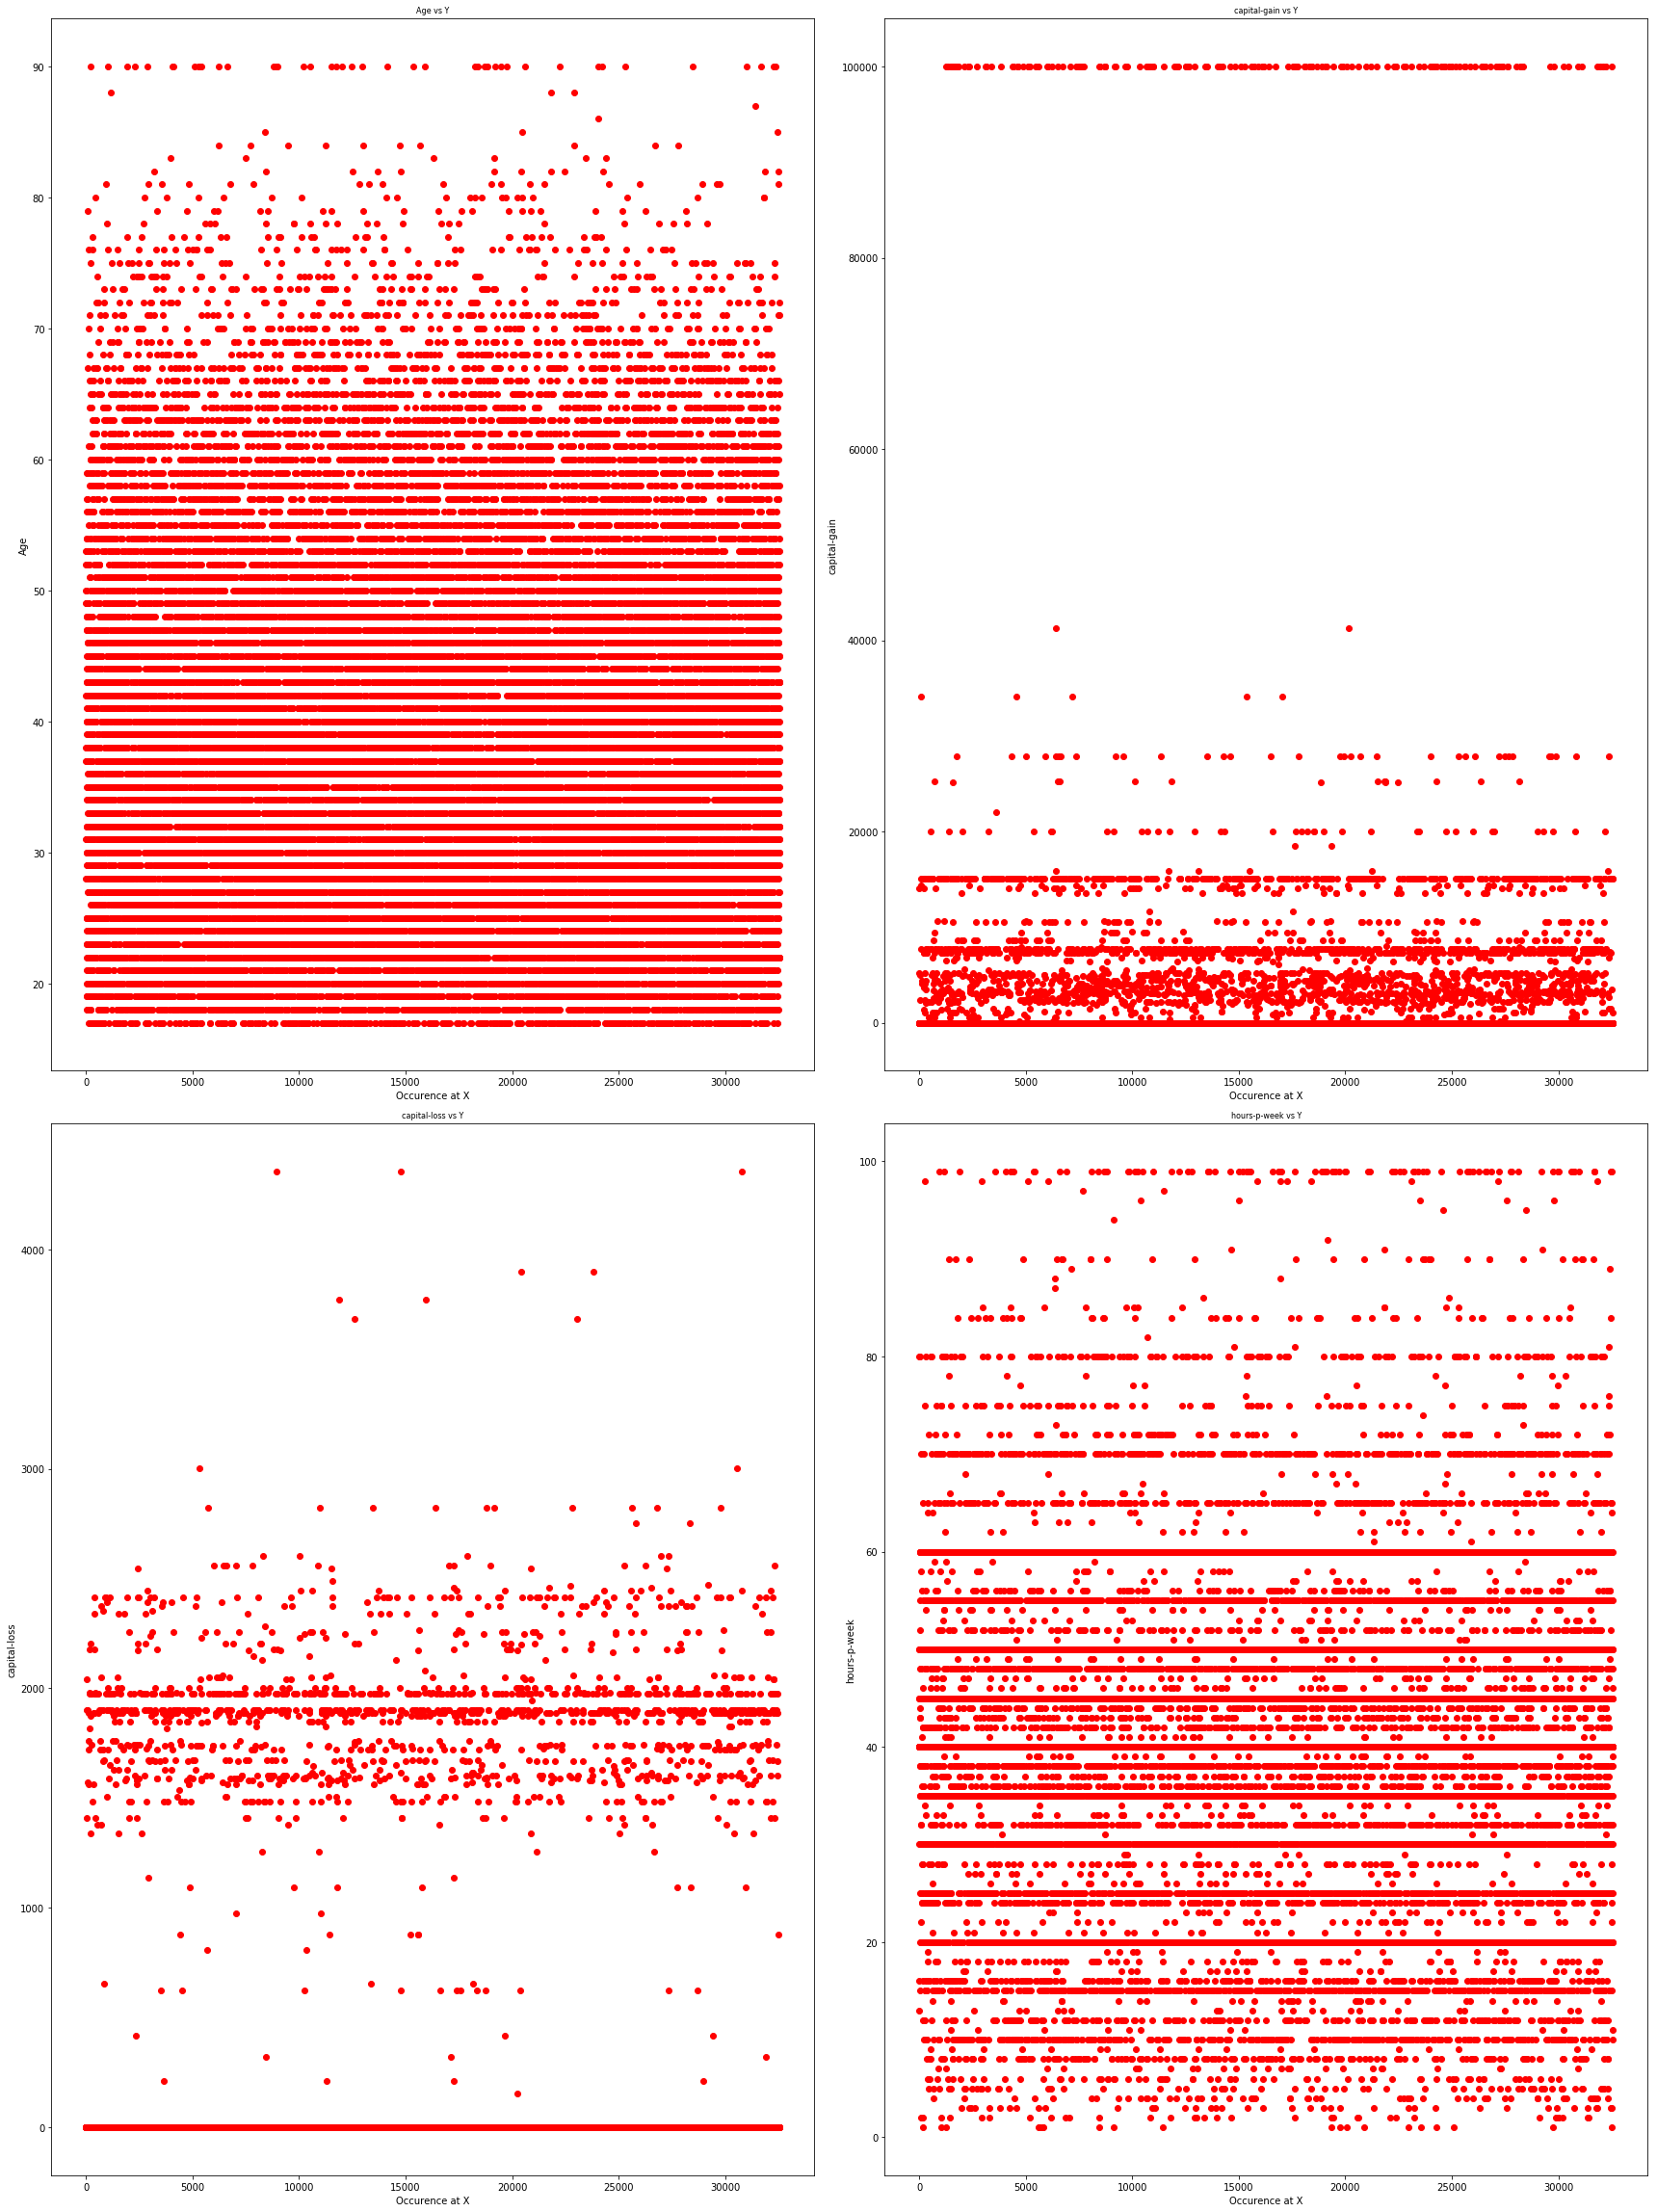

In [7]:
plot_df = graph_df[['Age', 'capital-gain', 'capital-loss', 'hours-p-week']]

fig = plt.figure(figsize=(24,32))
plt.clf() 
for i in range(4):
    plt.subplot(2, 2, i+1) 
    plt.title(plot_df.columns.values[i] + " vs Y" , fontdict={'fontsize': 8, 'fontweight': 'medium'})
    plt.plot(plot_df.iloc[:,i], 'ro')
    plt.ylabel(plot_df.columns.values[i]) 
    plt.xlabel("Occurence at X")
    
fig.tight_layout()

<h5> Understanding the graphs </h5>

> <h6> Histograms </h6>

>> The graphs above are suited based on the classification based dataset we have above. The histogram is an accurate way of seeing the density distribution occuring between different races, sexes, relationship statuses, and the average educational status reached. This had to be done after converting each of the values with the df converter above. Thus, for instance, we can see that there are a lot more men who are in this dataset - rougly double that of women. This reflects clearly in the histogram for the relationship status as the vast majority of the dataset individuals are "husbands". Meanwhile, the races are heavily between white and black. Lastly, the majority of the highest education that people have reached are about 10th grade. There are quite a bit who reached 12th grade (graduation of high school). 

> <h6> Scatter Plots </h6>

>> The scatter plot is accurate in representing the amount of occurences on an (x,y) plane of the total distribution based on age, capital-gain, capital-loss, and the amount of hours worked per week. We can see that there is a fairly constant number of people who are aged between 20 - 70 and then above 70 there are fewer and fewer. For capital gain we see that majority of individuals are under 20,000 whereas there are a quite a few whom are at a solid 100,000. Though it is fairly scattered for capital-losses. Lastly, the hours worked per week are fairly evenly scattered throughout from 20 - 100 hours. There are not as many that work 0 - 10 hours.



In [8]:
X = adult_df[['Age', 'education-numerical', 'hours-p-week', 'final weight', 'capital-loss', 'capital-gain']].values
T = T.values

# Helper Methods

In [78]:
def partition(X, T, ratio=[0.8, 0.2]): 
    N = X.shape[0]

    if len(T.shape) == 1:
        T = T.reshape((N,1))

    idxs = np.random.permutation(N)
        
    Xs = []
    Ts = []
    i = 0
    for k, r in enumerate(ratio):
        nrows = int(round(N * r)) 
        if k == len(ratio)-1:
            Xs.append(X[idxs[i:], :])
            Ts.append(T[idxs[i:], :])
        else:
            Xs.append(X[idxs[i:i+nrows], :])
            Ts.append(T[idxs[i:i+nrows], :])
        
        i += nrows
    
    return Xs, Ts

def partition_data():
    
    global Xtrain, Xtest, Ttrain, Ttest
    global XPtrain, XPtest, TPtrain, TPtest
    
    data, targets = partition(copy(X), copy(T))
    
    Xtrain, Xtest = data[0], data[1]
    XPtrain , XPtest = Xtrain.copy(), Xtest.copy()
    
    Ttrain, Ttest = targets[0], targets[1]
    TPtrain, TPtest = Ttrain.copy(), Ttest.copy()
    
def convert_to_bool(arr):
    arr = (arr == ' >50K').astype(int)
    return arr


def convert_perceptron_targets():
    """ Convert partitioned targets to binary targets formatted for the perceptron algorithm."""
    global XPtrain, XPtest, TPtrain, TPtest
    # TODO (1)
    TPtrain[TPtrain >= 1] = -1

    # TODO (2)
    TPtrain[TPtrain == 0] = 1

    # TODO (3)
    TPtest[TPtest >= 1] = -1

    # TODO (4)
    TPtest[TPtest == 0] = 1
    
def convert_logistic_targets():
    TiTrain = (Ttrain == np.unique(Ttrain)).astype(int)
    TiTest = (Ttest == np.unique(Ttest)).astype(int)
    
    return TiTrain, TiTest

def print_accuracy(y, t, name):
    if t[0] == ' >50K' or t[0] == ' <=50K':
        t = convert_to_bool(t)
    
    N = y.shape[0]
    n_correct = np.sum(y.flat == t.flat)
    n_correct_percent =  (n_correct / N) * 100
    print("{} accuracy:\t{}/{}\t{} %".format(name, n_correct, N, n_correct_percent))

<h6> Partitioning the predictors and Labeling the Targets </h6>

> In the below section, I use the `partition(.)` method to split the data and target sets into [80%, 20%] of the data sets so that one can be used to train the data and the other to test the data. One was made for the perceptron model, and the other was made for the logistic regression model. In the code below I then take the training target values and convert them into indicator variables i.e [0,1] which allows for classification of models.

In [118]:
partition_data()
print("Train data shape: {}".format(Xtrain.shape))
print("Train target shape: {}".format(Ttrain.shape))
print("Test data shape: {}".format(Xtest.shape))
print("Test target shape: {}".format(Ttest.shape))

Train data shape: (26048, 3)
Train target shape: (26048, 1)
Test data shape: (6512, 3)
Test target shape: (6512, 1)


In [119]:
Ttrain = convert_to_bool(Ttrain)
Ttest = convert_to_bool(Ttest)
TPtrain = convert_to_bool(TPtrain)
TPtest = convert_to_bool(TPtest)

<h6> Converting for the preceptron pocket model </h6>

> Below I converted for the pereceptron pocket model so that it is in the manner it is 1 or -1 depending on the boolean state it has.

In [120]:
convert_perceptron_targets()

np.unique(TPtrain), np.unique(TPtest)

(array([-1,  1]), array([-1,  1]))

<h6> Converting for the logistic regression model </h6>

> Below I converted for the logistic regression model so that it is in the manner [0,1] or [1,0] depending on the boolean state it has.

In [13]:
TiTrain, TiTest = convert_logistic_targets()

In [14]:
TiTrain.shape, TiTest.shape, Xtrain.shape, Xtest.shape

((26048, 2), (6512, 2), (26048, 6), (6512, 6))

# III. Method

### A. Super Class Definition

In [1]:
import numpy as np
from abc import ABC, abstractmethod


class BaseModel(ABC):
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None
        self.alpha = 0.1

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        # store the mean and std from the training set
        # when you learned mean & std, we do not update for test
        if self.meanX is None:
            self.meanX = np.mean(X, 0)
            self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        """ Utility to assure the input matrix mat is 2D. 
            If not, it throws an exception. 
            
            mat     ndarray
                    input matrix to check the shape
            name    string
                    matrix name to print out error
        """
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
        
    
    @abstractmethod
    def use(self, X):
        pass

### B. Pocket Algorithm

<h6> Explanation </h6>

> In the Pocket Algorithm implementation below, the class uses methods to train the weightings to find the best possible weighting for the training set. Once that best weighting is found, it is then logged in `self.w_pocket` and is returned. In the `train(.)` method, the method takes in the predictor variables data and target values and go value by value to refine the predictions. It does this for `n epochs` which I defined as 100, because with 26,0000 data samples, it takes too long to run more than that. After it has calculated each samples prediction and refined the weightings, it compares the weightings with `compare(.)`. The `compare(.)` method simply flattens out both the target values and compares it to the self.w and self.w_pocket predictions on the predictor variables. If the new weights are better, than it updates the pocket algorithms. Laslty, I added a converged value if it ever finds a convergence, but I doubt it ever will unless it is some very high value. The `use(.)` method finally uses the best pocket weightings to come up with predictions. 

In [195]:
class PocketAlgorithm(Classifier):
    """
        Logistic Regression classifier.
        
        attributes:
        w   nd.array 
            weights
    """
    def __init__(self):
        Classifier.__init__(self)
        self.w = None
        self.w_pocket = None
        
    
    def compare(self, X, T, w, wp, err):
        
        y = np.sign(X @ w)
        yp = np.sign(X @ self.w_pocket)
        y_correct =  np.sum(y.flatten() == T.flatten())
        yp_correct = np.sum(yp.flatten() == T.flatten())
        err.append(max(y_correct, yp_correct))
        return 1 if y_correct >= yp_correct else -1
    
    # train logistic regression model
    def train(self, X, T):
        X1train = self.add_ones(X)
        Ntrain = Xtrain.shape[0]
        Dtrain = Xtrain.shape[1]
        alpha = 0.1
        epochs = 100
        self.w = np.random.random(Dtrain+1)
        self.w_pocket = copy(self.w)
        err = []
        outer_errors = []
        for i in range(epochs):
            converged = True
            
            for k in range(Ntrain):
                converged = False
                y = self.w @ X1train[k]
                if np.sign(y) != np.sign(T[k]):
                    self.w += alpha * (T[k] * X1train[k])
                    
                    if self.compare(X1train, Ttrain, self.w, self.w_pocket, err) > 0:
                        self.w_pocket = copy(self.w)
            
            print('iteration', i)
            yp = np.sign(self.use(X))
            yp_correct = np.sum(yp.flatten() == T.flatten())
            outer_errors.append(yp_correct)
            if converged:
                print("converged at ", i)
                break
        
        return err, outer_errors

    # apply the learned model
    def use(self, X):
        X = self.add_ones(X)
        return X @ self.w_pocket

In [196]:
TPtrain.shape, normXPocket.shape

((26048, 1), (26048, 3))

<h6> Normalizing and Training the Pocket Algorithm </h6>

> Below I normalize the training data and pass it into the pocket algorithm. This then runs over 100 epochs to refine the algorithm. This takes a while because there are 26,000 data samples.

In [197]:
pocket = PocketAlgorithm()
normXPocket = pocket.normalize(Xtrain)
error_per_row, error_per_iteration = pocket.train(normXPocket, TPtrain)
predictions = pocket.use(normXPocket)

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration

<h6> Error graphs </h6>

> Below I plotted the error graphs per row and per iteration. Per iteration we see that the values of the errors start to level off as it is making mor correct predictions and it stays at that specific value. The error per iteration isn't completely correct but essentially tracks what the error of the predictions are based off each iteration and testing with the w_pocket values.

Text(0,0.5,'Error Rate')

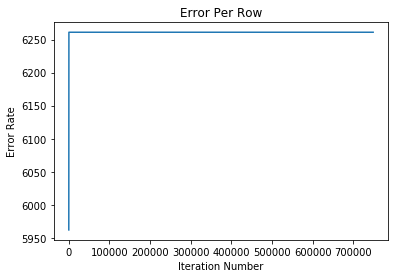

In [198]:
plt.plot(errors)
plt.title("Error Per Row")
plt.xlabel("Iteration Number")
plt.ylabel("Error Rate")

Text(0,0.5,'Error Rate')

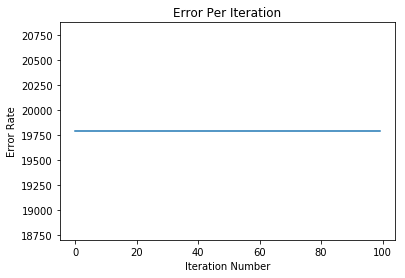

In [201]:
plt.plot(error_per_iteration)
plt.title("Error Per Iteration")
plt.xlabel("Iteration Number")
plt.ylabel("Error Rate")

<h6> Analyzing the predictions </h6>

> We can see below that the prediction accuracy is only 75%, however, it is important to note that this is only due to the fact that it only runs 100 times to refine the pocket algorithm. I think this is significant because if we look at the graph below, we can see that the blue dots are getting closer to the predicted red values (you may not be able to see it because of all the blue dots covering it). Nevertheless, it is slightly getting better with every iteration.

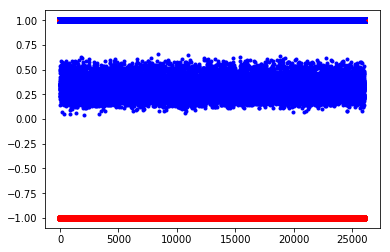

In [151]:
plt.plot(TPtrain, 'ro')
plt.plot(predictions, 'b.')
plt.plot(np.sign(predictions), 'bx')

In [152]:
Ntrain = Xtrain.shape[0]

In [153]:
ytrain_pocket = np.sign(predictions)
acc = np.sum(ytrain_pocket.flatten()==TPtrain.flatten()) / Ntrain
print("Train accuracy is: {}%".format(acc*100))

Train accuracy is: 75.96360565110565%


<h6> Trying it with the test data </h6>

> Below I try it with the test data to see what would happen if I were to try the same model with the test data (the 0.2 data partitioned used for testing). 

In [154]:
normPocketTest = pocket.normalize(Xtest)
predictions_test = pocket.use(normPocketTest)

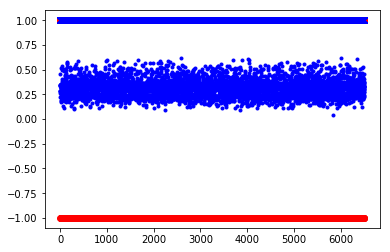

In [155]:
plt.plot(TPtest, 'ro')
plt.plot(predictions_test, 'b.')
plt.plot(np.sign(predictions_test), 'bx')

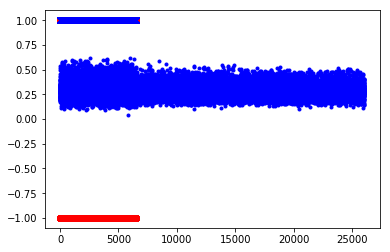

In [204]:
plt.plot(TPtest, 'ro')
plt.plot(predictions, 'b.')
plt.plot(predictions_test, 'b.')
plt.plot(np.sign(predictions_test), 'bx')

In [156]:
Ntest = Xtest.shape[0]

In [202]:
ytest_pocket = np.sign(predictions_test)
acc = np.sum(ytest_pocket.flatten()==TPtest.flatten()) / Ntest
print("Test accuracy is: {}%".format(acc*100))

Test accuracy is: 75.73710073710073%


<h6> Accuracy </h6>

> The accuracy between the training and the testing paritioned data looks to be the same. They both cap out at 75% accuracy with the predictions we get from the model. This shows that the data is actually stuck completely at this weighting.

### E. Logistic Regression

<h6> Explanation </h6>

> Logistic Regression allows for classification of targets that have binary classifications. For instance, in my data set the target that we are trying to predict has a value of whether the individual makes >50K or <=50K. Thus, this logistic regression assigns a value to the probability of each target value in what its guess is. The value with the highest probability is then chosen as the "prediction" by the logistic regression algorithm. In my implementation below, I have a `g(.)` function which acts as a wrapper class for the `softmax(.)` function that acts as the prediction values of the target values. Following the code, the `g(.)` function passes in the predictions `X @ W` to the `softmax(.)` which the list of predicted values and sums them to the probability of that value being picked. This is done by taking the `normalized sigmoid function` which uses 

\begin{align}
sigmoid = \frac{1}{(1+e^{(-x)})}\\
\end{align}

> and normalizes it to get 

\begin{align}
softmax = {P(T = k | x)} = \frac{e^{z_k}}{\sum_{i=1}^K e^{z_i}}
\end{align}


> This is how softmax calculates a list of values i.e [0.9998, -0.00002] which shows that the probability for the prediction of the firstt target value is high, thus it must be that value.


> The `train(.)` function does batch training to figure out the weightings that work well with the dataset. It makes the prediction with the softmax value and adjusts the weights per iteration. Finally the `use(.)` function uses the data set with the weightings with the softmax function to figure out the final probabilities for each of the samples.


In [81]:
class LogisticRegress(Classifier):
    """
        Logistic Regression classifier.
        
        attributes:
        w   nd.array 
            weights
    """
    def __init__(self):
        Classifier.__init__(self)
        
    def softmax(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        z = np.asarray(z, dtype=np.float128)
        numerator = np.exp(z)
        denominator = np.sum((np.exp(z)), axis=1, keepdims=True)
        return numerator / denominator

    # Wrapper for softmax
    def g(self, X):
        return self.softmax(X @ self.w)
    
    # train logistic regression model
    def train(self, X, T):
        n_iterations = 100
        alpha = 0.1
        D, K = X.shape[1], T.shape[1]
        
        # track errors
        err = []
        X = self.add_ones(X)
        self.w = np.random.rand(D+1, K)
        
        # fix the weightings
        for step in range(n_iterations):
            ys = self.g(X)
            self.w += alpha * X.T @ (T - ys)
            
            # track errors
            test = np.argmax(ys, axis=1)
            N = ys.shape[0]
            n_correct = np.sum(ys.flat == T.flat)
            n_correct_percent =  (n_correct / N)
            
            err.append(1- n_correct_percent)
        
        return err
        
    # apply the learned model
    def use(self, X):
        X = self.add_ones(X)
        return self.g(X)

# IV. Experiments

<h6> Logistic Regression </h6>

> The logistic regression tests below show the effectiveness of the algorithm on this particular dataset. Below the normalization of the data and training occurs. NormX is passed in as the normalized values used to predict the target variables (which are indicator boolean variables currently). I also used it on the test set to see how the predictions fare on the rest [0.2] partition of the data used for testing

In [82]:
logistic_train = LogisticRegress()
normX = logistic_train.normalize(Xtrain)
errors = logistic_train.train(normX, TiTrain)
Ytrain = logistic_train.use(normX)

normTest = logistic_train.normalize(Xtest)
Ytest = logistic_train.use(normTest)

<h6> Error per Iteration </h6>

> Before, I was skeptical that my model was actually working because it was not producing great results, it only had a 75% accuracy rate, however, after adding an extra variable to track the errors I can see that it was truly trying to find the lowest error rate. Below we can see the amount of jump in error in each iteration. Perhaps, if I were to save the best model with a version of the pocket algorithm it may actually save the lowest error rate (highest correct rate in this case) and use that as the best trained model. 

Text(0,0.5,'Error Rate')

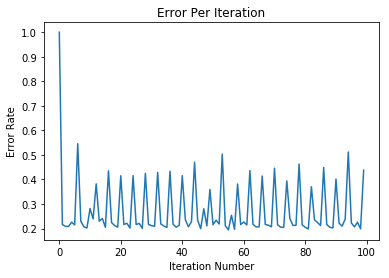

In [83]:
plt.plot(errors)
plt.title("Error Per Iteration")
plt.xlabel("Iteration Number")
plt.ylabel("Error Rate")

In [84]:
Ltrain = np.argmax(Ytrain, axis=1)
Ltest = np.argmax(Ytest, axis=1)
Ltrain

array([0, 0, 0, ..., 0, 0, 0])

Text(0.5,1,'Training results')

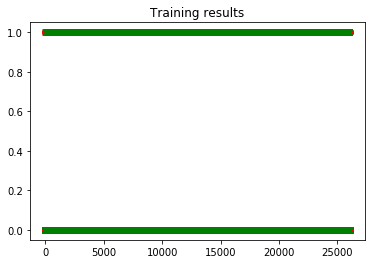

In [85]:
plt.plot(Ttrain, 'ro')
plt.plot(Ltrain, 'gx')
plt.title("Training results")

Text(0.5,1,'Training results')

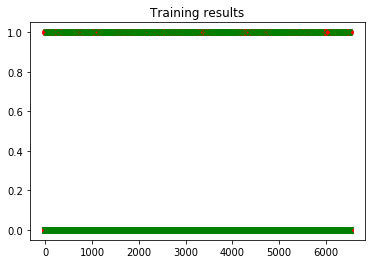

In [86]:
plt.plot(Ttest, 'ro')
plt.plot(Ltest, 'gx')
plt.title("Training results")

<h6> Graph Explanations </h6>

> Above we see the graphs for the comparisons in predictions vs actual target variables. It is hard to see because unfortuantely matplotlib uses (R,G,B) only for the color of predictions. However, if you look closely the `red Os` are the target and the `green X's` are the predicted values. They are scattered but there are quite a few corerct predictions.

In [88]:
Ttrain_flat = Ttrain.flatten()
Ttest_flat = Ttest.flatten()
print_accuracy(Ltrain, Ttrain_flat, "Train")
print_accuracy(Ltest, Ttest_flat, "Test")

Train accuracy:	20410/26048	78.35534398034399 %
Test accuracy:	5097/6512	78.27088452088452 %


<h6> Accuracy </h6>

> After running the normalized version of the predictor variables into the logistic regression predictor, it looks like the overall accuracy was average. I believe this may be due to the fact that there are just too many samples to linearly seperate the data perfectly. Therefore, there is a problem with the accuracy. Furthermore, this accuracy was shown after adding more predictor variables where before I did it with only 3 predictor variables and got a lower accuracy. Perhaps this what is needed is more predicted variables so that the targets become more linearly seperable and easy to distinguish for the logistic regression algorithm. Below I talk about the tests I tried before I added the 3 extra variables.

<h6> Other tests </h6>

> The above test was done from experimenting by adding more values into the predictors. However, before I added the last three variables of ['final weight', 'capital-loss', 'capital-gain'] - I was getting a much lower accuracy rate. Below I have implemented the prediction with only 3 variables.

In [109]:
X = X[:,0:3]
partition_data()

first_train = LogisticRegress()
normX = first_train.normalize(Xtrain)
errors = first_train.train(normX, TiTrain)
Ytrain = first_train.use(normX)


normTest = first_train.normalize(Xtest)
Ytest = first_train.use(normTest)

Text(0,0.5,'Error Rate')

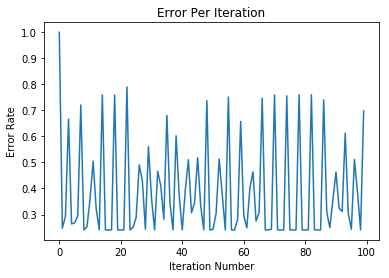

In [110]:
plt.plot(errors)
plt.title("Error Per Iteration")
plt.xlabel("Iteration Number")
plt.ylabel("Error Rate")

In [111]:
Ltest = np.argmax(Ytest, axis=1)
Ltrain = np.argmax(Ytrain, axis=1)

Text(0.5,1,'Training results')

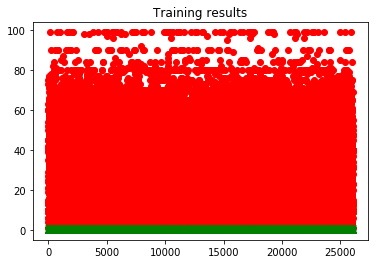

In [112]:
plt.plot(Xtrain, 'ro')
plt.plot(Ltrain, 'gx')
plt.title("Training results")

<h6> Plot </h6>

> This plot shows simply how widely spread the data is with the predictions compared to the correct value.

In [113]:
Ttrain_flat = Ttrain.flatten()
Ttest_flat = Ttest.flatten()
print_accuracy(Ltest, Ttest, "Test")
print_accuracy(Ltrain, Ttrain, "Train")

Test accuracy:	4697/6512	72.12837837837837 %
Train accuracy:	18640/26048	71.56019656019656 %


<h6> Accuracy </h6>

> As you can see, with less predictor variables there is a greater discrepancy in the error rate and also lower accuracy overall within the test and train data. This may be due to the fact that it becomes LESS linearly seperable for the logistic algorithm to seperate the targets with less predictors.

# References


> https://archive.ics.uci.edu/ml/datasets/Adult $^1$
